# Project 2: Perception of AI Innovation Across Industries
## Econ 1680: MLTA and Econ

#### Name: Isha Ponugoti

## II. Descriptive Analysis
Next, I go through the key variables that I will use throughout my methods section and display some summary statistics to start my analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

import random
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import time

First, I import the dataframe that I made.

In [43]:
df = pd.read_csv('labelled_techcrunch_articles.csv')

In [44]:
industry_counts = df['Industry'].value_counts()
print(industry_counts)

Technology        475
Media             160
Finance            63
Education          61
Government         45
Enterprise         44
Other              40
Social Media       35
Robotics           31
Healthcare         29
Transportation     22
Name: Industry, dtype: int64


Preview of my DataFrame:

In [4]:
df.head()

,Title,Industry,Content,URL,Date,tags
0,What we’ve learned from the women behind the A...,Technology,"The AI boom, love it or find it to be a bit mo...",/2024/04/06/what-weve-learned-from-the-women-b...,"02:05 PM EDT April 06, 2024","['AI policy', 'AI startups', 'Equity podcast',..."
1,Sundar Pichai on the challenge of innovating i...,Technology,It was a notable appearance because Pichai’s b...,/2024/04/05/sundar-pichai-on-the-challenge-of-...,"05:59 PM EDT April 05, 2024","['Alphabet', 'artificial intelligence', 'Googl..."
2,"Meta’s new AI deepfake playbook: More labels, ...",Technology,Meta has announced changes to its rules on AI-...,/2024/04/05/meta-deepfake-labels/,"05:29 PM EDT April 05, 2024",['meta deepfake and manipulated media policy']
3,TechCrunch Minute: YC Demo Day’s biggest showc...,Technology,Well-known startup accelerator Y Combinator he...,/2024/04/05/techcrunch-minute-ycs-demo-day-hig...,"04:00 PM EDT April 05, 2024","['AI', 'Startups', 'the techcrunch minute', 'Y..."
4,Rubrik’s IPO filing reveals an AI governance c...,Technology,"Rubrik, the data management company that filed...",/2024/04/05/rubrik-ai-governance-committee/,"01:41 PM EDT April 05, 2024","['AI governance', 'EU AI Act', 'onetrust', 'Ru..."


Here is the range of dates I use in my analysis: 

In [5]:
# change date format for easier parsing
df['DateTime'] = pd.to_datetime(df['Date'], format='%I:%M %p EDT %B %d, %Y')

# check the conversion
print(df['DateTime'].head())

0   2024-04-06 14:05:00
1   2024-04-05 17:59:00
2   2024-04-05 17:29:00
3   2024-04-05 16:00:00
4   2024-04-05 13:41:00
Name: DateTime, dtype: datetime64[ns]


In [6]:
# print the date range
date_range_start = df['DateTime'].min()
date_range_end = df['DateTime'].max()

print(f"Date range: {date_range_start} to {date_range_end}")

Date range: 2023-04-03 23:05:00 to 2024-04-06 14:05:00


I look at articles 1005 articles between April 3, 2023 and April 5, 2024.

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishaponugoti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishaponugoti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))

def most_common_words(content):
    word_tokens = word_tokenize(content.lower())
    filtered_content = [w for w in word_tokens if not w in stop_words and w.isalpha()]
    return filtered_content

all_words = df['Content'].apply(most_common_words).sum() # Concatenate all lists
words_frequency = nltk.FreqDist(all_words)

print("Most common words:", words_frequency.most_common(10))

Most common words: [('ai', 706), ('generative', 202), ('today', 202), ('new', 201), ('announced', 181), ('company', 157), ('google', 139), ('startup', 139), ('openai', 120), ('million', 92)]


In [9]:
df.describe(include='all')

/var/folders/12/hm8g859d3ml7f4vx9905_51m0000gn/T/ipykernel_91390/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Title,Industry,Content,URL,Date,tags,DateTime
count,1005,1005,1005,1005,1005,1005,1005
unique,1005,11,996,1005,927,975,927
top,What we’ve learned from the women behind the A...,Technology,Keeping up with an industry as fast-moving as ...,/2024/04/06/what-weve-learned-from-the-women-b...,"12:00 PM EDT August 29, 2023","['AI', 'newsletter', 'this week in AI', 'this ...",2023-08-29 12:00:00
freq,1,475,5,1,11,8,11
first,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-03 23:05:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-06 14:05:00


## III. Method (Text Analysis/Sentiment Analysis)
I then employ sentiment analysis to analyze the sentiment of TechCrunch articles within each industry, categorizing sentiments as positive, neutral, or negative towards AI within that industry.

Next, I use my dataframe to track the number of AI mentions over time to identify the intensity of AI innovation within an industry. 

In [10]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz
from sklearn.linear_model import LogisticRegression
from transformers import pipeline

Use pre-trained Hugging Face model to assess sentiment of each article based on its summary/preview. Run on first few articles to test/check output.

In [11]:
# initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

print()
for i in range(10):
    print(df['Content'][0:10].tolist()[i])
    print(sentiment_pipeline(df['Content'][0:10].tolist())[i]['label'])
    print()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.



The AI boom, love it or find it to be a bit more hype than substance, is here to stay. That means lots of companies raising oodles of dollars, a healthy dose of regulatory concern, academic work, a...
POSITIVE

It was a notable appearance because Pichai’s been having a bit of a rough go lately. Google is widely perceived to have gotten a late start on generative AI.
NEGATIVE

Meta has announced changes to its rules on AI-generated content and manipulated media following criticism from its Oversight Board. Starting next month, the company said, it will label a wider rang...
NEGATIVE

Well-known startup accelerator Y Combinator held one of its two yearly Demo Day events this week, showcasing hundreds of startups that recently went through its program. Judging from our coverage o...


KeyboardInterrupt: 

Satisfied with this classifcation, I create a sentiment column in my df.

In [12]:
sentiments = sentiment_pipeline(df['Content'].tolist())

In [13]:
# Extracting the 'label' from each sentiment analysis result
sentiment_labels = [sentiment['label'] for sentiment in sentiments]

# Assigning the list of labels to a new column in the DataFrame
df['Sentiment'] = sentiment_labels

In [ ]:
df['Sentiment']

In [ ]:
df['Sentiment'].describe()

Next, I look at AI sentiment within each industry.

In [ ]:
histogram = df['Sentiment'].value_counts().reindex(["NEGATIVE", "POSITIVE"]).plot(kind='bar')
plt.title("Sentiment Categories of TechCrunch Articles")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Articles")
plt.show()

You can see that the data is pretty evenly divided among positive and negative articles.

In [14]:
sentiment_by_industry = df.groupby('Industry')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_industry)

Sentiment       NEGATIVE  POSITIVE
Industry                          
Education             27        34
Enterprise            23        21
Finance               32        31
Government            25        20
Healthcare            10        19
Media                 66        94
Other                 18        22
Robotics              15        16
Social Media          17        18
Technology           228       247
Transportation         9        13


In [ ]:
# Plotting histogram of sentiment analysis by industry
sentiment_by_industry.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Analysis by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

It's harder to see the trends when "Other" is in the mix, so I remove it below.

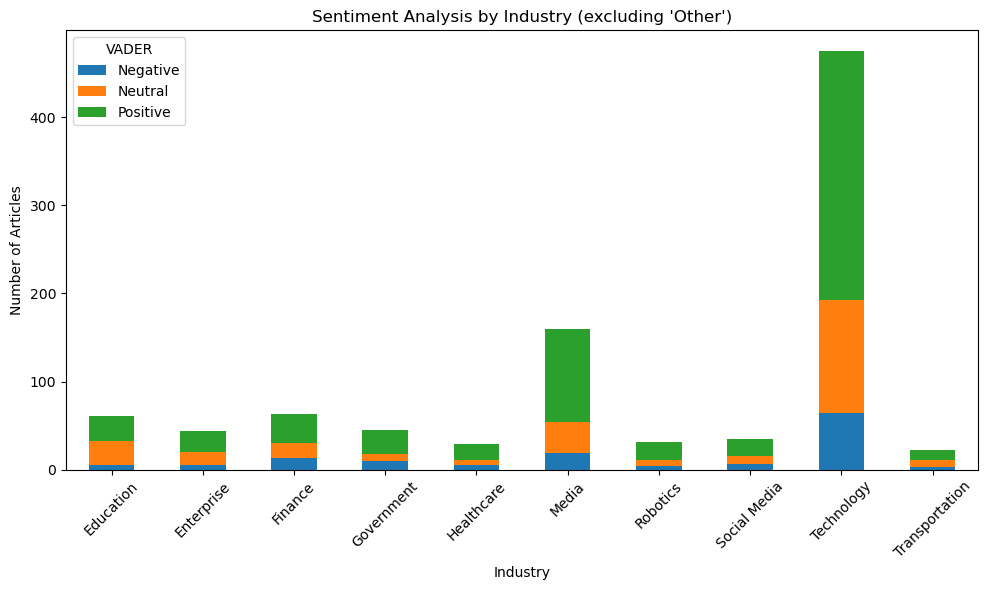

In [45]:
df_clean = sentiment_by_industry[sentiment_by_industry.index != 'Other']

# Plotting the DataFrame without 'Other' industry
df_clean.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Analysis by Industry (excluding 'Other')")
plt.xlabel("Industry")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Creating a new DataFrame for percentage calculation
df_percentage = df_clean.copy()
df_percentage['Total'] = df_percentage['POSITIVE'] + df_percentage['NEGATIVE']
df_percentage['POSITIVE'] = (df_percentage['POSITIVE'] / df_percentage['Total']) * 100
df_percentage['NEGATIVE'] = (df_percentage['NEGATIVE'] / df_percentage['Total']) * 100

# Dropping the 'Total' column as it's no longer needed for the plot
df_percentage.drop('Total', axis=1, inplace=True)

# Sort by positive percentage
df_percentage = df_percentage.sort_values(by='POSITIVE')

# Plotting
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Percentage of Positive vs Negative Sentiments by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.grid(linestyle = "dashed")
plt.show()

Try Vader Sentiment Analysis

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
# function to print sentiments of the sentence.
def sentiment_scores(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
#     print("Overall sentiment dictionary is : ", sentiment_dict)
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
#     print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        return("Negative")
    else:
        return("Neutral")

In [18]:
for sentence in df['Content'][0:10].tolist():
    print(sentence)
    print(sentiment_scores(sentence))
    print()

The AI boom, love it or find it to be a bit more hype than substance, is here to stay. That means lots of companies raising oodles of dollars, a healthy dose of regulatory concern, academic work, a...
Positive

It was a notable appearance because Pichai’s been having a bit of a rough go lately. Google is widely perceived to have gotten a late start on generative AI.
Neutral

Meta has announced changes to its rules on AI-generated content and manipulated media following criticism from its Oversight Board. Starting next month, the company said, it will label a wider rang...
Negative

Well-known startup accelerator Y Combinator held one of its two yearly Demo Day events this week, showcasing hundreds of startups that recently went through its program. Judging from our coverage o...
Neutral

Rubrik, the data management company that filed for IPO this week, has an AI governance committee, per its IPO filing. The detail is worth noting because it could soon be the new normal.
Positive

Robov

In [19]:
# get VADER sentiment values
df['VADER'] = df['Content'].apply(sentiment_scores)

In [20]:
df.describe()

/var/folders/12/hm8g859d3ml7f4vx9905_51m0000gn/T/ipykernel_91390/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Title,Industry,Content,URL,Date,tags,DateTime,Sentiment,VADER
count,1005,1005,1005,1005,1005,1005,1005,1005,1005
unique,1005,11,996,1005,927,975,927,2,3
top,What we’ve learned from the women behind the A...,Technology,Keeping up with an industry as fast-moving as ...,/2024/04/06/what-weve-learned-from-the-women-b...,"12:00 PM EDT August 29, 2023","['AI', 'newsletter', 'this week in AI', 'this ...",2023-08-29 12:00:00,POSITIVE,Positive
freq,1,475,5,1,11,8,11,535,593
first,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-03 23:05:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-06 14:05:00,NaN,NaN


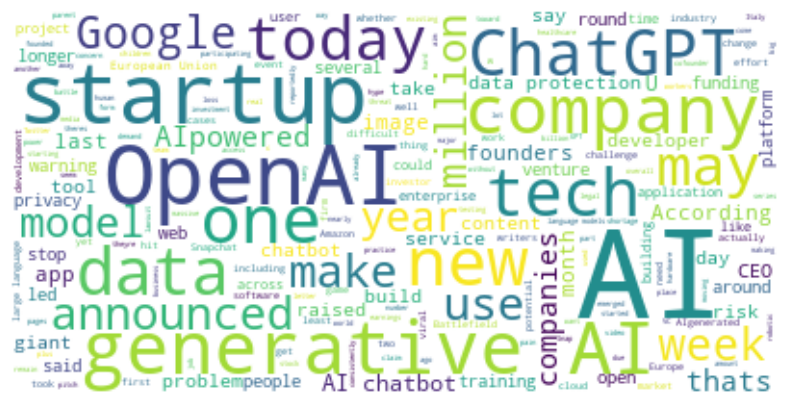

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

# Filter for positive sentiments
positive_texts = df[df['VADER'] == 'Negative']['Content']

# Prepare text data for the word cloud
text = " ".join(review for review in positive_texts)
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers

# Optional: additional stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["example", "e.g.", "etc"])  # Add any specific stopwords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

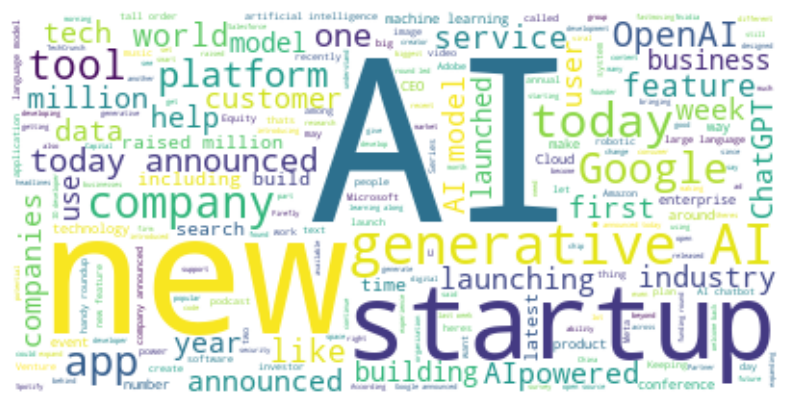

In [22]:
# Filter for positive sentiments according to the "Sentiment" column
positive_texts = df[df['Sentiment'] == 'POSITIVE']['Content']

# Prepare text data for the word cloud
text = " ".join(review for review in positive_texts)
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers

# Optional: additional stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["example", "e.g.", "etc"])  # Add any specific stopwords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

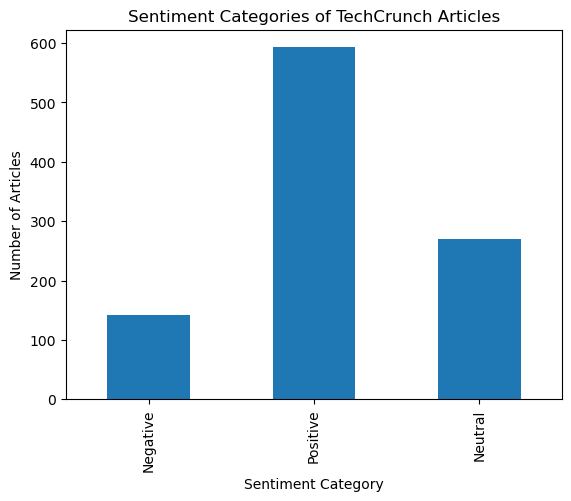

In [23]:
histogram = df['VADER'].value_counts().reindex(["Negative", "Positive", "Neutral"]).plot(kind='bar')
plt.title("Sentiment Categories of TechCrunch Articles")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Articles")
plt.show()

In [24]:
sentiment_by_industry = df.groupby('Industry')['VADER'].value_counts().unstack().fillna(0)
print(sentiment_by_industry)

VADER           Negative  Neutral  Positive
Industry                                   
Education              5       27        29
Enterprise             5       15        24
Finance               13       17        33
Government            10        8        27
Healthcare             5        6        18
Media                 19       35       106
Other                  8       10        22
Robotics               4        7        20
Social Media           6        9        20
Technology            64      128       283
Transportation         3        8        11


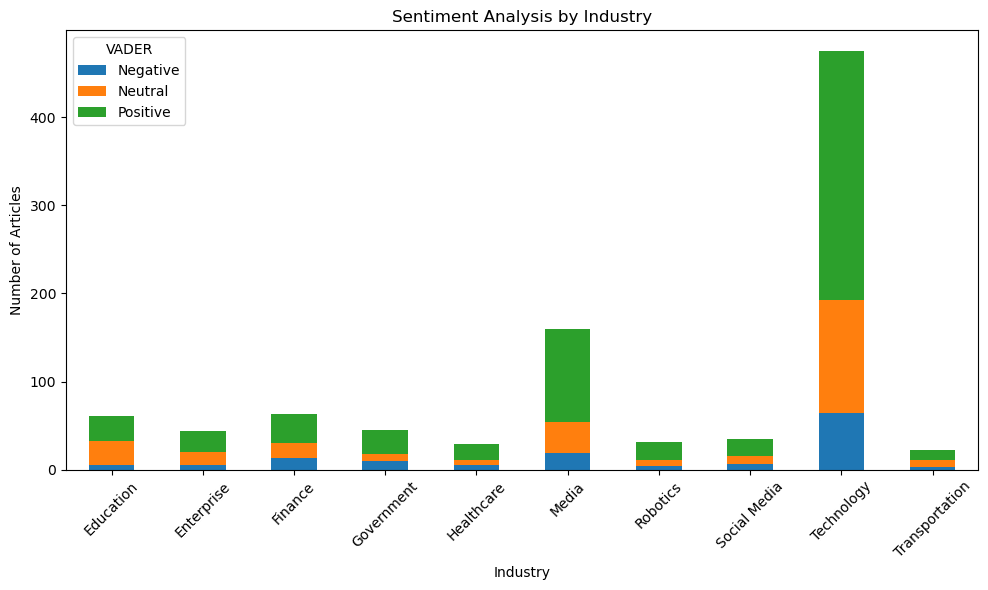

In [25]:
df_clean = sentiment_by_industry[sentiment_by_industry.index != 'Other']
df_clean = df_clean.rename(columns={"Business Services": "Enterprise", "Media/Entertainment": "Media"})

# Plotting the DataFrame without 'Other' industry
df_clean.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Analysis by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Creating a new DataFrame for percentage calculation
df_percentage = df_clean.copy()
df_percentage['Total'] = df_percentage['Positive'] + df_percentage['Negative']
df_percentage['Positive'] = (df_percentage['Positive'] / df_percentage['Total']) * 100
df_percentage['Negative'] = (df_percentage['Negative'] / df_percentage['Total']) * 100

# Dropping the 'Total' column as it's no longer needed for the plot
df_percentage.drop('Total', axis=1, inplace=True)

# Sort by positive percentage
df_percentage = df_percentage.sort_values(by='Positive')

# Plotting
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Percentage of Positive vs Negative Sentiments by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.grid(linestyle = "dashed")
plt.show()

In [ ]:
df_clean

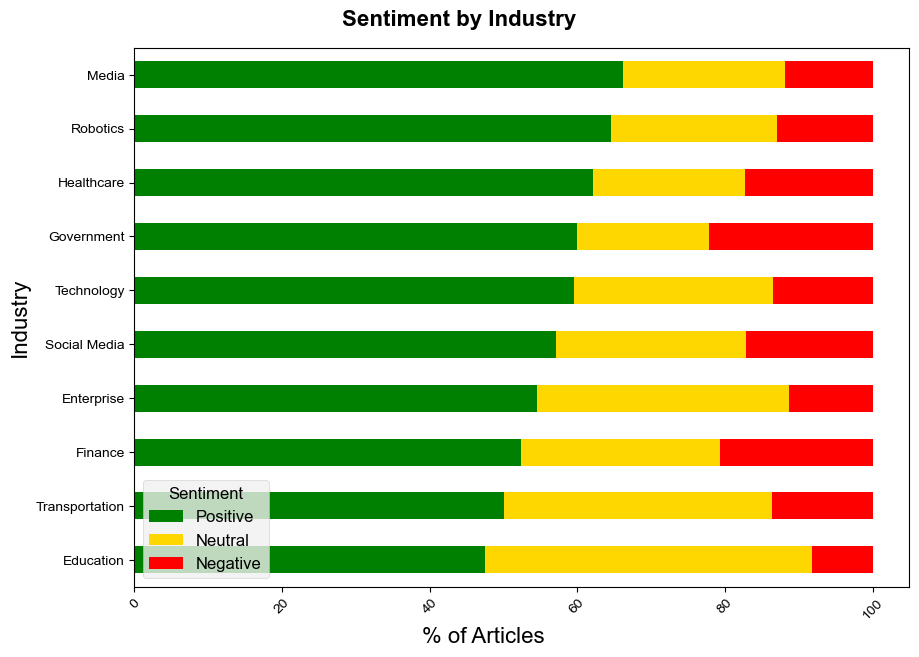

In [55]:
# Creating a new DataFrame for percentage calculation
df_percentage = df_clean.copy()
df_percentage['Total'] = df_percentage['Positive'] + df_percentage['Negative'] + df_percentage['Neutral']
df_percentage['Positive'] = (df_percentage['Positive'] / df_percentage['Total']) * 100
# df_percentage['Positive/Neutral'] = ((df_percentage['Positive'] + df_percentage['Neutral']) / df_percentage['Total']) * 100
df_percentage['Negative'] = (df_percentage['Negative'] / df_percentage['Total']) * 100
df_percentage['Neutral'] = (df_percentage['Neutral'] / df_percentage['Total']) * 100
# df_percentage.drop('Neutral', axis=1, inplace=True)
# df_percentage.drop('Positive', axis=1, inplace=True)

# Dropping the 'Total' column as it's no longer needed for the plot
df_percentage.drop('Total', axis=1, inplace=True)

# Sort by positive percentage
df_percentage = df_percentage.sort_values(by='Positive')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'sans-serif']  # Adjust as per the availability


# Plotting
colors = ["#008000", "#FFD700", "#FF0000"]  # Bright green for Positive, Bright yellow for Neutral, Bright red for Negative
fig, ax = plt.subplots(figsize=(10, 7))
df_percentage[["Positive", "Neutral", "Negative"]].plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.style.use('fivethirtyeight') 
fig.suptitle('Sentiment by Industry', fontweight='bold', fontsize=16, verticalalignment='center', y=0.92, x=.45)
fig.set_facecolor('white')  # gca - get current axes
ax.set_facecolor('white')  # gcf - get current figure
ax.set_ylabel('Industry', fontsize=16)  # 'labelpad' for positioning the x-axis label lower if necessary
ax.set_xlabel('% of Articles', fontsize=16, x=.45)
ax.legend(title='Sentiment', fontsize='12', title_fontsize='12', loc='lower left')
plt.xticks(rotation=45)
# plt.grid(linestyle = "dashed")
plt.show()

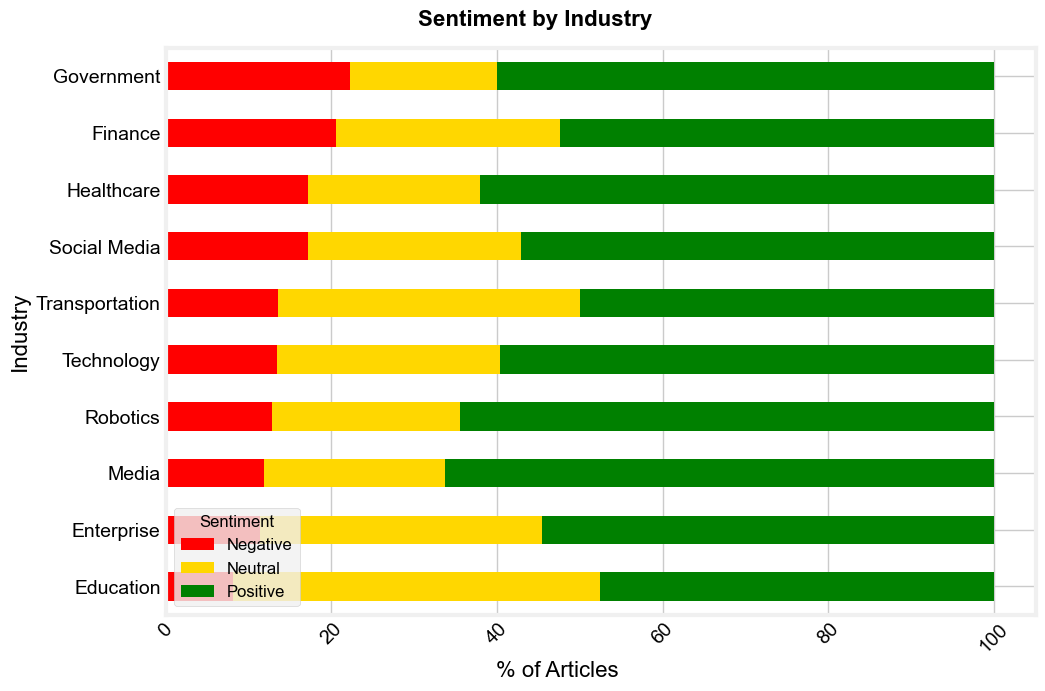

In [58]:
df_percentage = df_percentage.sort_values(by='Negative')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'sans-serif']  # Adjust as per the availability


# Plotting
colors = ["#FF0000", "#FFD700", "#008000"]  # Bright green for Positive, Bright yellow for Neutral, Bright red for Negative
fig, ax = plt.subplots(figsize=(10, 7))
df_percentage[["Negative", "Neutral", "Positive" ]].plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.style.use('fivethirtyeight') 
fig.suptitle('Sentiment by Industry', fontweight='bold', fontsize=16, verticalalignment='center', y=0.92, x=.45)
fig.set_facecolor('white')  # gca - get current axes
ax.set_facecolor('white')  # gcf - get current figure
ax.set_ylabel('Industry', fontsize=16)  # 'labelpad' for positioning the x-axis label lower if necessary
ax.set_xlabel('% of Articles', fontsize=16, x=.45)
ax.legend(title='Sentiment', fontsize='12', title_fontsize='12', loc='lower left')
plt.xticks(rotation=45)
# plt.grid(linestyle = "dashed")
plt.show()

Try to assign more industry labels

## Time Series Analysis (sentiment over time)
### Overall
### By Industry
### Using VADER and Hugging Face to see what gives better results

In [26]:
df.head()

,Title,Industry,Content,URL,Date,tags,DateTime,Sentiment,VADER
0,What we’ve learned from the women behind the A...,Technology,"The AI boom, love it or find it to be a bit mo...",/2024/04/06/what-weve-learned-from-the-women-b...,"02:05 PM EDT April 06, 2024","['AI policy', 'AI startups', 'Equity podcast',...",2024-04-06 14:05:00,POSITIVE,Positive
1,Sundar Pichai on the challenge of innovating i...,Technology,It was a notable appearance because Pichai’s b...,/2024/04/05/sundar-pichai-on-the-challenge-of-...,"05:59 PM EDT April 05, 2024","['Alphabet', 'artificial intelligence', 'Googl...",2024-04-05 17:59:00,NEGATIVE,Neutral
2,"Meta’s new AI deepfake playbook: More labels, ...",Technology,Meta has announced changes to its rules on AI-...,/2024/04/05/meta-deepfake-labels/,"05:29 PM EDT April 05, 2024",['meta deepfake and manipulated media policy'],2024-04-05 17:29:00,NEGATIVE,Negative
3,TechCrunch Minute: YC Demo Day’s biggest showc...,Technology,Well-known startup accelerator Y Combinator he...,/2024/04/05/techcrunch-minute-ycs-demo-day-hig...,"04:00 PM EDT April 05, 2024","['AI', 'Startups', 'the techcrunch minute', 'Y...",2024-04-05 16:00:00,POSITIVE,Neutral
4,Rubrik’s IPO filing reveals an AI governance c...,Technology,"Rubrik, the data management company that filed...",/2024/04/05/rubrik-ai-governance-committee/,"01:41 PM EDT April 05, 2024","['AI governance', 'EU AI Act', 'onetrust', 'Ru...",2024-04-05 13:41:00,POSITIVE,Positive


Regress sentiment by industry

In [42]:
df_clean

VADER,Negative,Neutral,Positive
Industry,,,
Education,5,27,29
Enterprise,5,15,24
Finance,13,17,33
Government,10,8,27
Healthcare,5,6,18
Media,19,35,106
Robotics,4,7,20
Social Media,6,9,20
Technology,64,128,283


In [47]:
# function to print sentiments of the sentence.
def compound(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound'] * 100

In [46]:
# get VADER sentiment values
df['sentiment_compound'] = df['Content'].apply(compound)

In [48]:
df.head()

,Title,Industry,Content,URL,Date,tags,sentiment_compound
0,What we’ve learned from the women behind the A...,Technology,"The AI boom, love it or find it to be a bit mo...",/2024/04/06/what-weve-learned-from-the-women-b...,"02:05 PM EDT April 06, 2024","['AI policy', 'AI startups', 'Equity podcast',...",78.45
1,Sundar Pichai on the challenge of innovating i...,Technology,It was a notable appearance because Pichai’s b...,/2024/04/05/sundar-pichai-on-the-challenge-of-...,"05:59 PM EDT April 05, 2024","['Alphabet', 'artificial intelligence', 'Googl...",0.00
2,"Meta’s new AI deepfake playbook: More labels, ...",Technology,Meta has announced changes to its rules on AI-...,/2024/04/05/meta-deepfake-labels/,"05:29 PM EDT April 05, 2024",['meta deepfake and manipulated media policy'],-67.05
3,TechCrunch Minute: YC Demo Day’s biggest showc...,Technology,Well-known startup accelerator Y Combinator he...,/2024/04/05/techcrunch-minute-ycs-demo-day-hig...,"04:00 PM EDT April 05, 2024","['AI', 'Startups', 'the techcrunch minute', 'Y...",0.00
4,Rubrik’s IPO filing reveals an AI governance c...,Technology,"Rubrik, the data management company that filed...",/2024/04/05/rubrik-ai-governance-committee/,"01:41 PM EDT April 05, 2024","['AI governance', 'EU AI Act', 'onetrust', 'Ru...",22.63


In [49]:
df2 = df.copy(deep=True)

In [50]:
df2

,Title,Industry,Content,URL,Date,tags,sentiment_compound
0,What we’ve learned from the women behind the A...,Technology,"The AI boom, love it or find it to be a bit mo...",/2024/04/06/what-weve-learned-from-the-women-b...,"02:05 PM EDT April 06, 2024","['AI policy', 'AI startups', 'Equity podcast',...",78.45
1,Sundar Pichai on the challenge of innovating i...,Technology,It was a notable appearance because Pichai’s b...,/2024/04/05/sundar-pichai-on-the-challenge-of-...,"05:59 PM EDT April 05, 2024","['Alphabet', 'artificial intelligence', 'Googl...",0.00
2,"Meta’s new AI deepfake playbook: More labels, ...",Technology,Meta has announced changes to its rules on AI-...,/2024/04/05/meta-deepfake-labels/,"05:29 PM EDT April 05, 2024",['meta deepfake and manipulated media policy'],-67.05
3,TechCrunch Minute: YC Demo Day’s biggest showc...,Technology,Well-known startup accelerator Y Combinator he...,/2024/04/05/techcrunch-minute-ycs-demo-day-hig...,"04:00 PM EDT April 05, 2024","['AI', 'Startups', 'the techcrunch minute', 'Y...",0.00
4,Rubrik’s IPO filing reveals an AI governance c...,Technology,"Rubrik, the data management company that filed...",/2024/04/05/rubrik-ai-governance-committee/,"01:41 PM EDT April 05, 2024","['AI governance', 'EU AI Act', 'onetrust', 'Ru...",22.63
...,...,...,...,...,...,...,...
1000,AI-powered search engine Perplexity AI lands $...,Technology,A search startup raised $26 million recently t...,/2023/04/04/ai-powered-search-engine-perplexit...,"02:18 PM EDT April 04, 2023","['AI', 'artificial intelligence', 'funding', '...",0.00
1001,Fetcherr raises $12.5M to dynamically price ai...,Finance,Roy Cohen believes that there’s a severe under...,/2023/04/04/fetcherr-raises-12-5m-to-dynamical...,"01:00 PM EDT April 04, 2023","['AI', 'airfare', 'fetcherr', 'funding', 'pric...",-38.18
1002,Amazon wants to boost ten generative AI startu...,Technology,Amazon’s first foray into the world of acceler...,/2023/04/04/aws-generative-ai-accelerator/,"10:00 AM EDT April 04, 2023","['AI', 'Amazon', 'AWS', 'Generative AI', 'vent...",71.84
1003,"Amid a boom in AI accelerators, a UC Berkeley-...",Technology,House Fund’s new AI accelerator program will r...,/2023/04/03/amid-a-boom-in-ai-accelerators-a-u...,"04:01 AM EDT April 04, 2023","['accelerators', 'AI', 'House Fund', 'OpenAI',...",27.32


In [53]:
# Calculate mean sentiment score by industry
# mean_sentiment_by_industry = df.groupby('Industry')['sentiment_compound'].mean()
# print(mean_sentiment_by_industry)

# mean_sentiment_by_industry.plot(kind='bar')
# plt.title('Average Sentiment Score by Industry')
# plt.xlabel('Industry')
# plt.ylabel('Average Sentiment Score')
# plt.show()

# # Assume 'Industry' is the column with industry names
# df = pd.get_dummies(df, columns=['Industry'], drop_first=True)  # drop_first=True to avoid multicollinearity

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the features and the target:
X = df[[col for col in df.columns if 'Industry_' in col]]  # Only the dummy variables
y = df['sentiment_compound']  # Assuming 'sentiment_compound' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients can tell you the influence of each industry

industry_names = X.columns  # these are the names of the dummy variables
coefficients = model.coef_
coefficients_dict = dict(zip(industry_names, coefficients))

print("Coefficients by Industry:")
for industry, coef in coefficients_dict.items():
    print(f"{industry}: {coef:.4f}")
    
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred, squared=False))


Coefficients by Industry:
Industry_Enterprise: 9.7433
Industry_Finance: -0.2989
Industry_Government: 0.3693
Industry_Healthcare: 1.3700
Industry_Media: 9.6004
Industry_Other: 7.5922
Industry_Robotics: 10.4157
Industry_Social Media: -2.2963
Industry_Technology: 4.7649
Industry_Transportation: -2.4906
R-squared: -0.047893453823952825
MSE: 36.20451595970569


In [54]:
import statsmodels.api as sm
# Define the features and target
df_copy = df[['Date', "sentiment_compound", "Industry_Enterprise", "Industry_Finance", "Industry_Government", "Industry_Healthcare", "Industry_Media", "Industry_Other", "Industry_Robotics", "Industry_Social Media", "Industry_Technology", "Industry_Transportation"]]


df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

# Extract year, month, etc., from the date column
df_copy['year'] = df_copy['Date'].dt.year
df_copy['month'] = df_copy['Date'].dt.month

X = df_copy.drop(['sentiment_compound', 'Date', 'Industry_Other', 'year', 'month'], axis=1)
y = df_copy['sentiment_compound']

# df.head()

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extracting coefficients and standard errors
results_df = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse
})

# Print the results
print("Coefficients and Standard Errors by Industry:")
print(results_df)


Coefficients and Standard Errors by Industry:
                         Coefficient  Standard Error
const                      19.646931        3.525490
Industry_Enterprise         4.007615        6.399959
Industry_Finance           -3.452328        5.688152
Industry_Government        -0.986708        6.350234
Industry_Healthcare         2.099966        7.464354
Industry_Media              6.642757        4.502770
Industry_Robotics           7.457263        7.274877
Industry_Social Media      -0.922931        6.949522
Industry_Technology         2.852417        3.882254
Industry_Transportation    -6.063749        8.336058


/var/folders/12/hm8g859d3ml7f4vx9905_51m0000gn/T/ipykernel_91390/2648589927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
/var/folders/12/hm8g859d3ml7f4vx9905_51m0000gn/T/ipykernel_91390/2648589927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['year'] = df_copy['Date'].dt.year
/var/folders/12/hm8g859d3ml7f4vx9905_51m0000gn/T/ipykernel_91390/2648589927.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `results_df` is your DataFrame containing the coefficients and standard errors
results_df['Lower CI'] = results_df['Coefficient'] - 1.96 * results_df['Standard Error']
results_df['Upper CI'] = results_df['Coefficient'] + 1.96 * results_df['Standard Error']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
results_df['Coefficient'].plot(kind='bar', yerr=results_df['Standard Error'] * 1.96, ax=ax, color='skyblue', capsize=4)
ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Coefficient')
ax.set_title('Coefficients and Confidence Intervals for Industry Impact on Sentiment')
plt.xticks(rotation=45)
plt.show()


logistic regression:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert 'DateTime' from datetime to separate year and month columns for use in the model
df['Year'] = pd.to_datetime(df['DateTime']).dt.year
df['Month'] = pd.to_datetime(df['DateTime']).dt.month

# Encode sentiment labels
label_encoder = LabelEncoder()
df['SentimentEncoded'] = label_encoder.fit_transform(df['Sentiment'])

# Convert 'Industry' into dummy variables
df_encoded = pd.get_dummies(df, columns=['Industry'], drop_first=True)

# Define your target and predictors
X = df_encoded[['Year', 'Month'] + [col for col in df_encoded.columns if 'Industry_' in col]]
y = df_encoded['SentimentEncoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model for multi-class classification
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
df['SentimentEncoded'] = label_encoder.fit_transform(df['Sentiment'])

# Extract year and month from DateTime if not already done
df['Year'] = pd.to_datetime(df.index).year
df['Month'] = pd.to_datetime(df.index).month

# Initialize a dictionary to store model performance
model_performance = {}

# Loop through each industry
for industry in df['Industry'].unique():
    # Subset the dataframe by industry
    df_subset = df[df['Industry'] == industry]
    
    # Convert 'Industry' into dummy variables, if there are other categorical variables
    df_encoded = pd.get_dummies(df_subset, columns=['Industry'], drop_first=True)
    
    # Define your target and predictors
    X = df_encoded[['Year', 'Month']]
    y = df_encoded['SentimentEncoded']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a logistic regression model for multi-class classification
    model = LogisticRegression(multi_class='ovr', solver='liblinear')
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    
    # Store results
    model_performance[industry] = {'Accuracy': accuracy, 'Report': report}

# Output the performance for each industry
for industry, performance in model_performance.items():
    print(f"Industry: {industry}")
    print("Accuracy Score:", performance['Accuracy'])
    print("Classification Report:\n", pd.DataFrame(performance['Report']).transpose())
